In [5]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Pm\Downloads\car data.csv')
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [6]:
print(data.shape)

print(data.info())

print(data.isnull().sum())

print(data.describe())

(301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000

In [13]:
import pandas as pd

data = pd.read_csv(r'C:\Users\prana\Downloads\car data.csv')

data.dropna(inplace=True)


data = pd.get_dummies(data, drop_first=True)


print("Present_Price", data.columns)

target_column = 'Present_Price'  

X = data.drop(target_column, axis=1)  
y = data[target_column]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Present_Price Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       ...
       'Car_Name_swift', 'Car_Name_sx4', 'Car_Name_verna',
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual'],
      dtype='object', length=106)
Features shape: (301, 105)
Target shape: (301,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3.3460601631828606
R^2 Score: 0.9336581833872325


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Mean Squared Error: 5.733369142008197
Random Forest R^2 Score: 0.8863253780139454


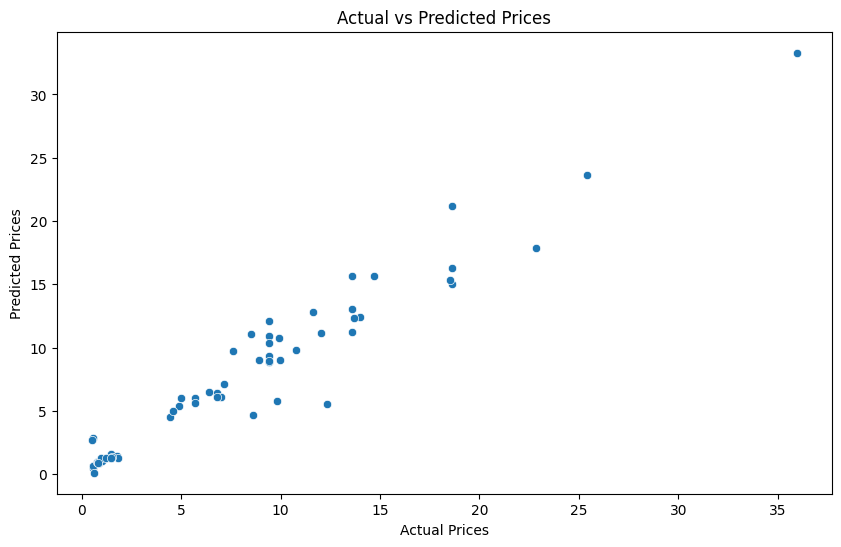

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [19]:
import joblib

joblib.dump(rf_model, 'car_price_prediction_model.pkl')

['car_price_prediction_model.pkl']